#1. Working Directory and package installation

In [ ]:
from google.colab import drive
import os
import sys
import pandas as pd
import numpy as np
drive.mount('/content/drive/',force_remount=True)
sys.path.insert(0,'/content/drive/MyDrive/BackUp_RL_CodeBase')
os.chdir('/content/drive/MyDrive/BackUp_RL_CodeBase')
os.getcwd()

Mounted at /content/drive/


'/content/drive/MyDrive/BackUp_RL_CodeBase'

In [ ]:
%pip install stockstats
from stockstats import StockDataFrame as Sdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2. Read cleaned files

In [ ]:
df_price = pd.read_csv("Input/B_priceClean.csv")
print(df_price.shape)
df_price.head()

(229152, 8)


date     tic      close       open       high        low     adjcp  \
0  2001-02-05  ABI.BR  18.880274  18.755239  18.880274  18.730232  3.025609   
1  2001-02-06  ABI.BR  18.767742  18.799002  18.886526  18.598946  3.007577   
2  2001-02-07  ABI.BR  18.849014  18.880274  18.880274  18.723982  3.020599   
3  2001-02-08  ABI.BR  18.755239  18.849014  18.849014  18.742737  3.005573   
4  2001-02-09  ABI.BR  18.661463  18.755239  18.755239  18.605198  2.990545   

      volume  
0   781132.0  
1  1738341.0  
2   613206.0  
3  1151417.0  
4   659007.0

#3. Add TA-indicators

TA calculated based on unjusted closing price

In [ ]:
df = df_price.copy()
df = df.sort_values(by=["tic", "date"])
stock = Sdf.retype(df.copy()) # indexed by date
unique_ticker = stock.tic.unique()

In [ ]:
# # testing
# temp = stock.loc[stock.tic == 'BBVA.MC'].iloc[4109:4364]
# temp1 = stock.loc[stock.tic == 'OR.PA'].iloc[4109:4364]
# temp = temp.append(temp1)
# temp = temp.sort_values(by=["tic", "date"])
# print(temp)
# temp =  Sdf.retype(temp.copy())
# temp_indicator = temp[temp.tic == 'BBVA.MC']['rsi_5']
# print(temp_indicator) 

tic       close        open        high         low  \
date                                                                  
2017-01-02  BBVA.MC    6.440000    6.459000    6.474000    6.374000   
2017-01-03  BBVA.MC    6.565000    6.480000    6.686000    6.452000   
2017-01-04  BBVA.MC    6.495000    6.585000    6.601000    6.434000   
2017-01-05  BBVA.MC    6.518000    6.463000    6.554000    6.437000   
2017-01-06  BBVA.MC    6.566000    6.530000    6.578000    6.454000   
...             ...         ...         ...         ...         ...   
2017-12-21    OR.PA  188.100006  186.850006  188.100006  185.300003   
2017-12-22    OR.PA  186.800003  187.750000  188.600006  186.100006   
2017-12-27    OR.PA  187.600006  186.550003  188.199997  186.300003   
2017-12-28    OR.PA  185.750000  187.699997  187.899994  185.250000   
2017-12-29    OR.PA  184.949997  185.750000  186.449997  184.949997   

                 adjcp       volume  
date                                 
2017-01-02    4.948664   19607737.0  
2017-01-03    5.044717  160332414.0  
2017-01-04    4.990927  179333129.0  
2017-01-05    5.008602  144550880.0  
2017-01-06    5.045485  113930823.0  
...                ...          ...  
2017-12-21  171.728333     447629.0  
2017-12-22  170.541489     356697.0  
2017-12-27  171.271820     237259.0  
2017-12-28  169.582855     290330.0  
2017-12-29  168.852493     319592.0  

[510 rows x 7 columns]

In [ ]:
tech_indicator_list = ["macd","boll_ub","boll_lb", "rsi_5","cci_30","dx_30","close_30_sma", "close_60_sma",]

In [ ]:
for indicator in tech_indicator_list:
    indicator_df = pd.DataFrame()
    for i in range(len(unique_ticker)):
        try:
            temp_indicator = stock[stock.tic == unique_ticker[i]][indicator]
            temp_indicator = pd.DataFrame(temp_indicator)
            temp_indicator["tic"] = unique_ticker[i]
            temp_indicator["date"] = df[df.tic == unique_ticker[i]]["date"].to_list()
            indicator_df = indicator_df.append(
                temp_indicator, ignore_index=True
            )
        except Exception as e:
            print(e)
    df = df.merge(
        indicator_df[["tic", "date", indicator]], on=["tic", "date"], how="left"
    )
df = df.sort_values(by=["date", "tic"])

In [ ]:
# resort all technical indicator into a dictionary
dict_tech = {}
for i in range(len(tech_indicator_list)):
  dict_tech[tech_indicator_list[i]] = df.pivot(columns='tic',index='date',values=tech_indicator_list[i])
# tech_indicator_list = ["macd","boll_ub","boll_lb", "rsi_30","cci_30","dx_30","close_30_sma", "close_60_sma",]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9304d8af90>,
      dtype=object)

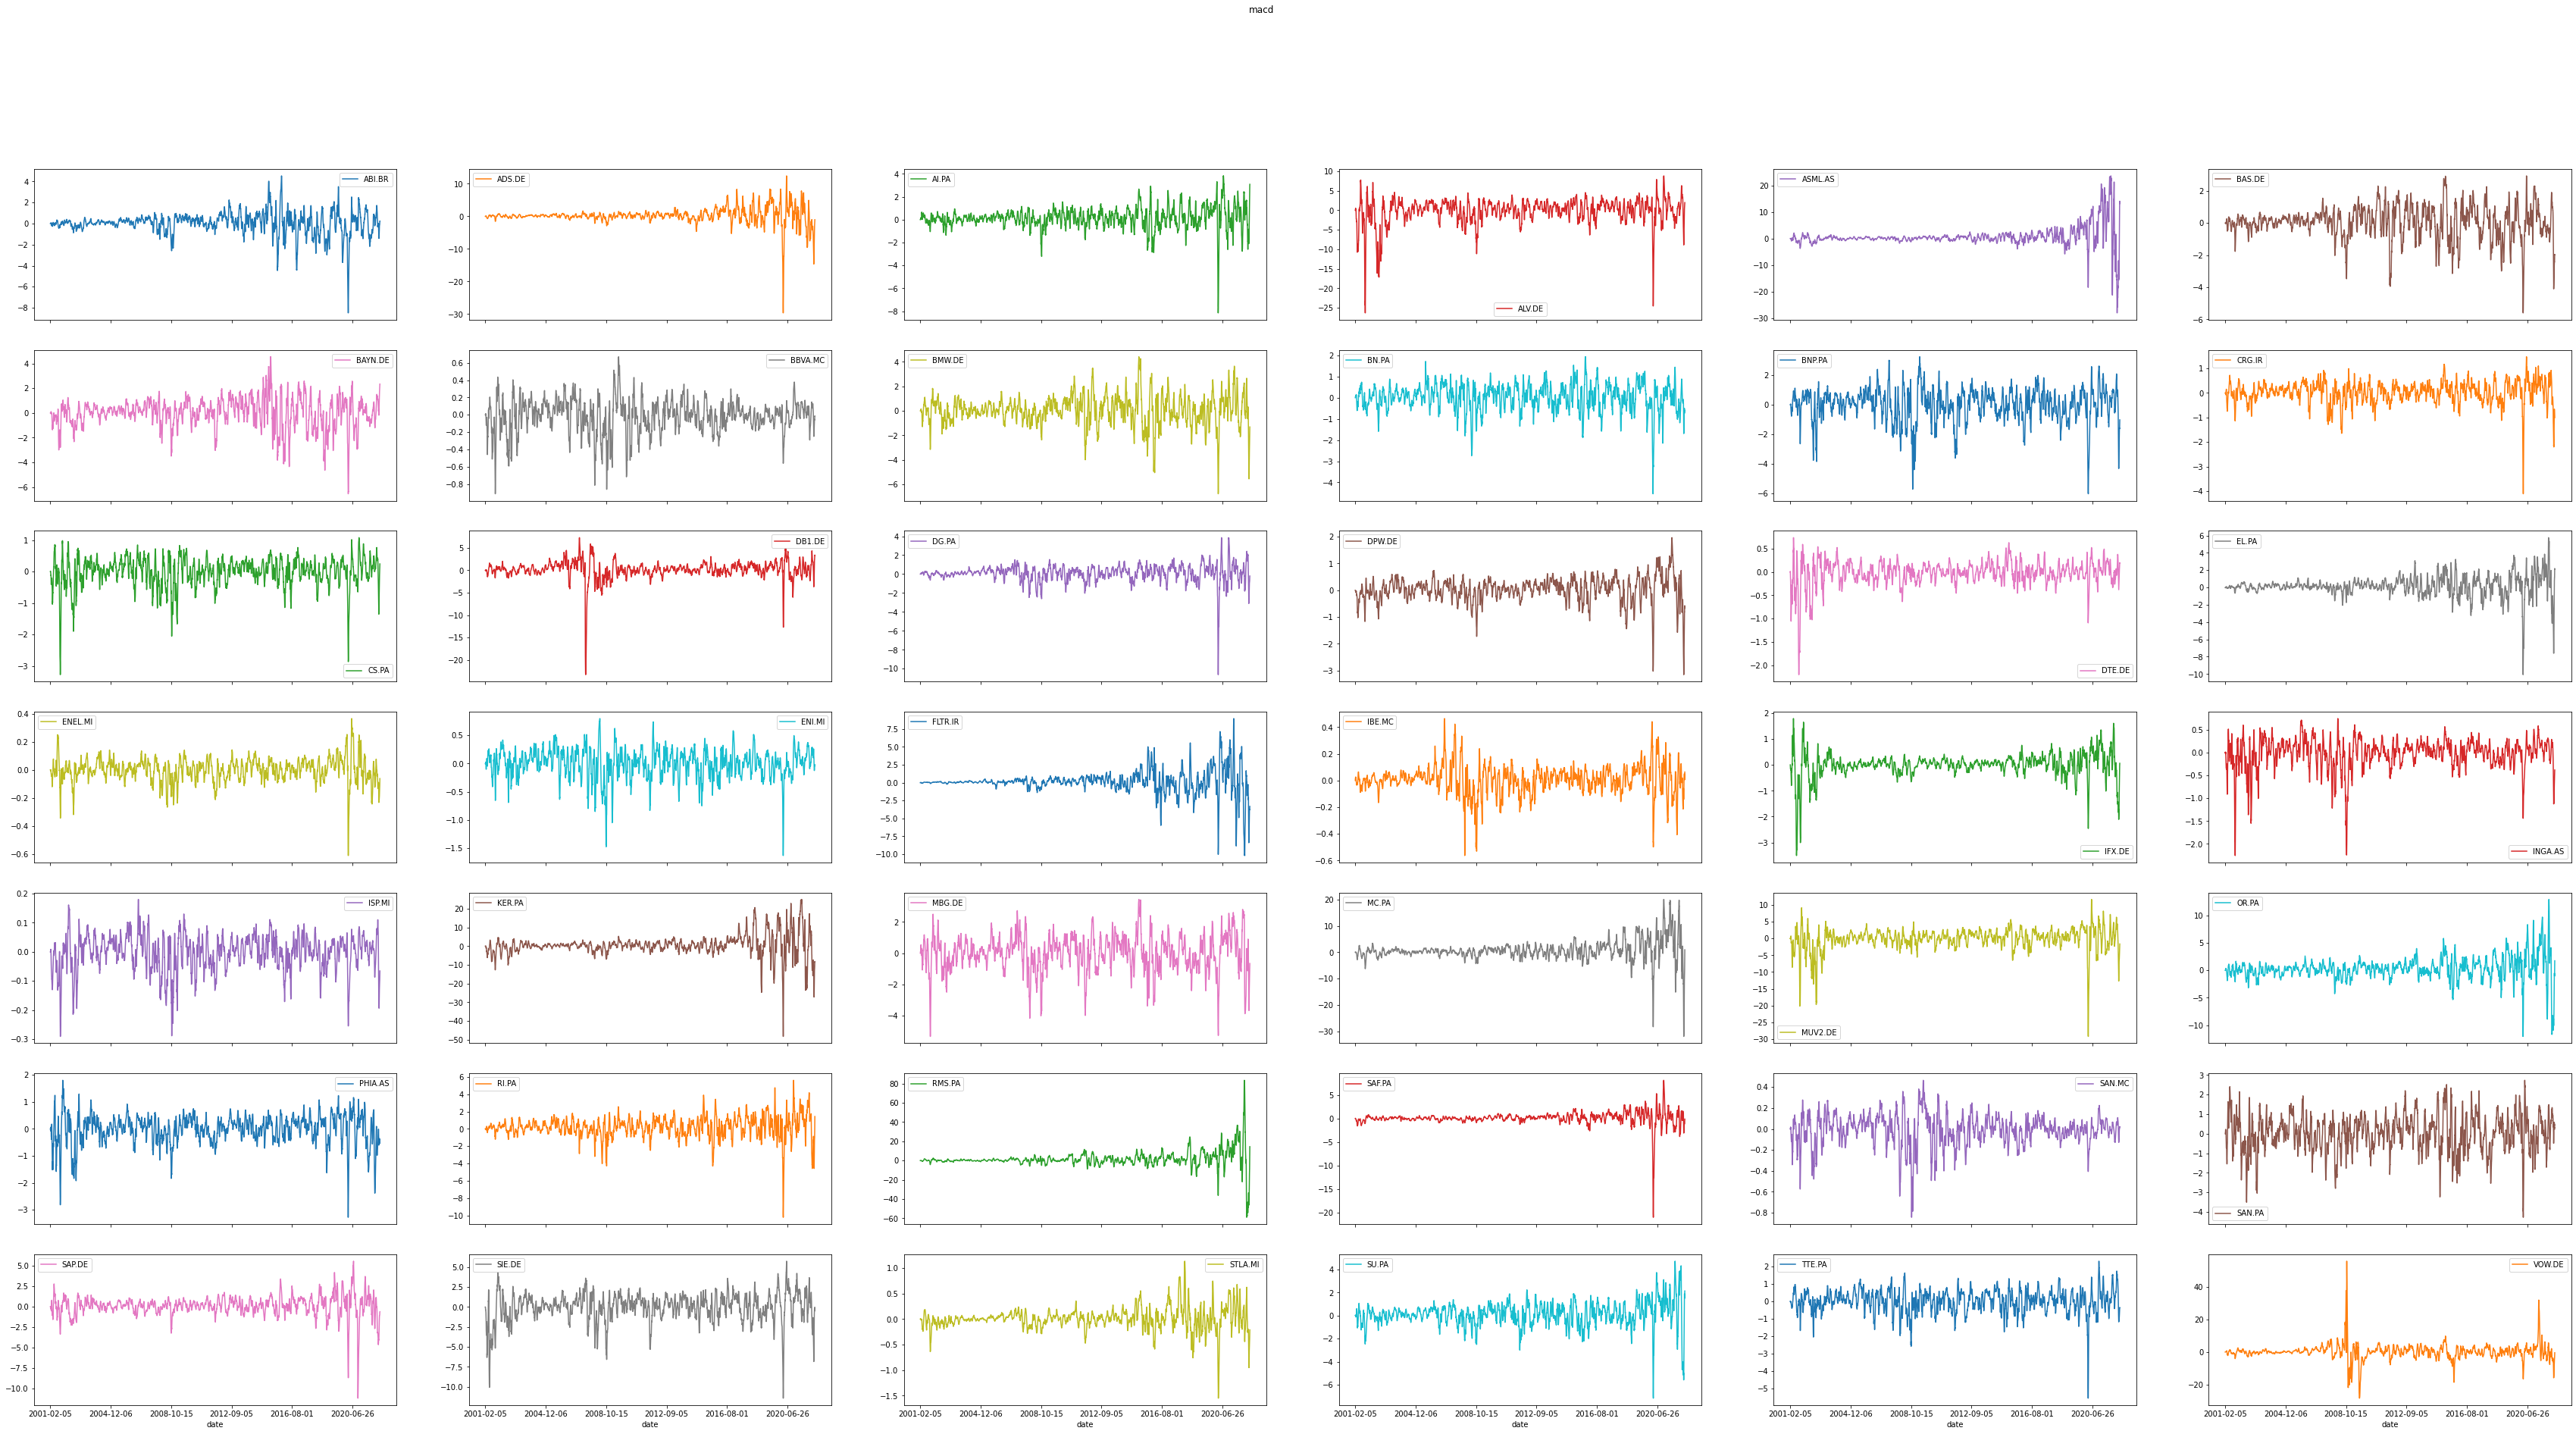

In [ ]:
dict_tech['macd'].plot(subplots=True,layout=(7,6),figsize=(60,30),title='macd')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9303b82d10>,
      dtype=object)

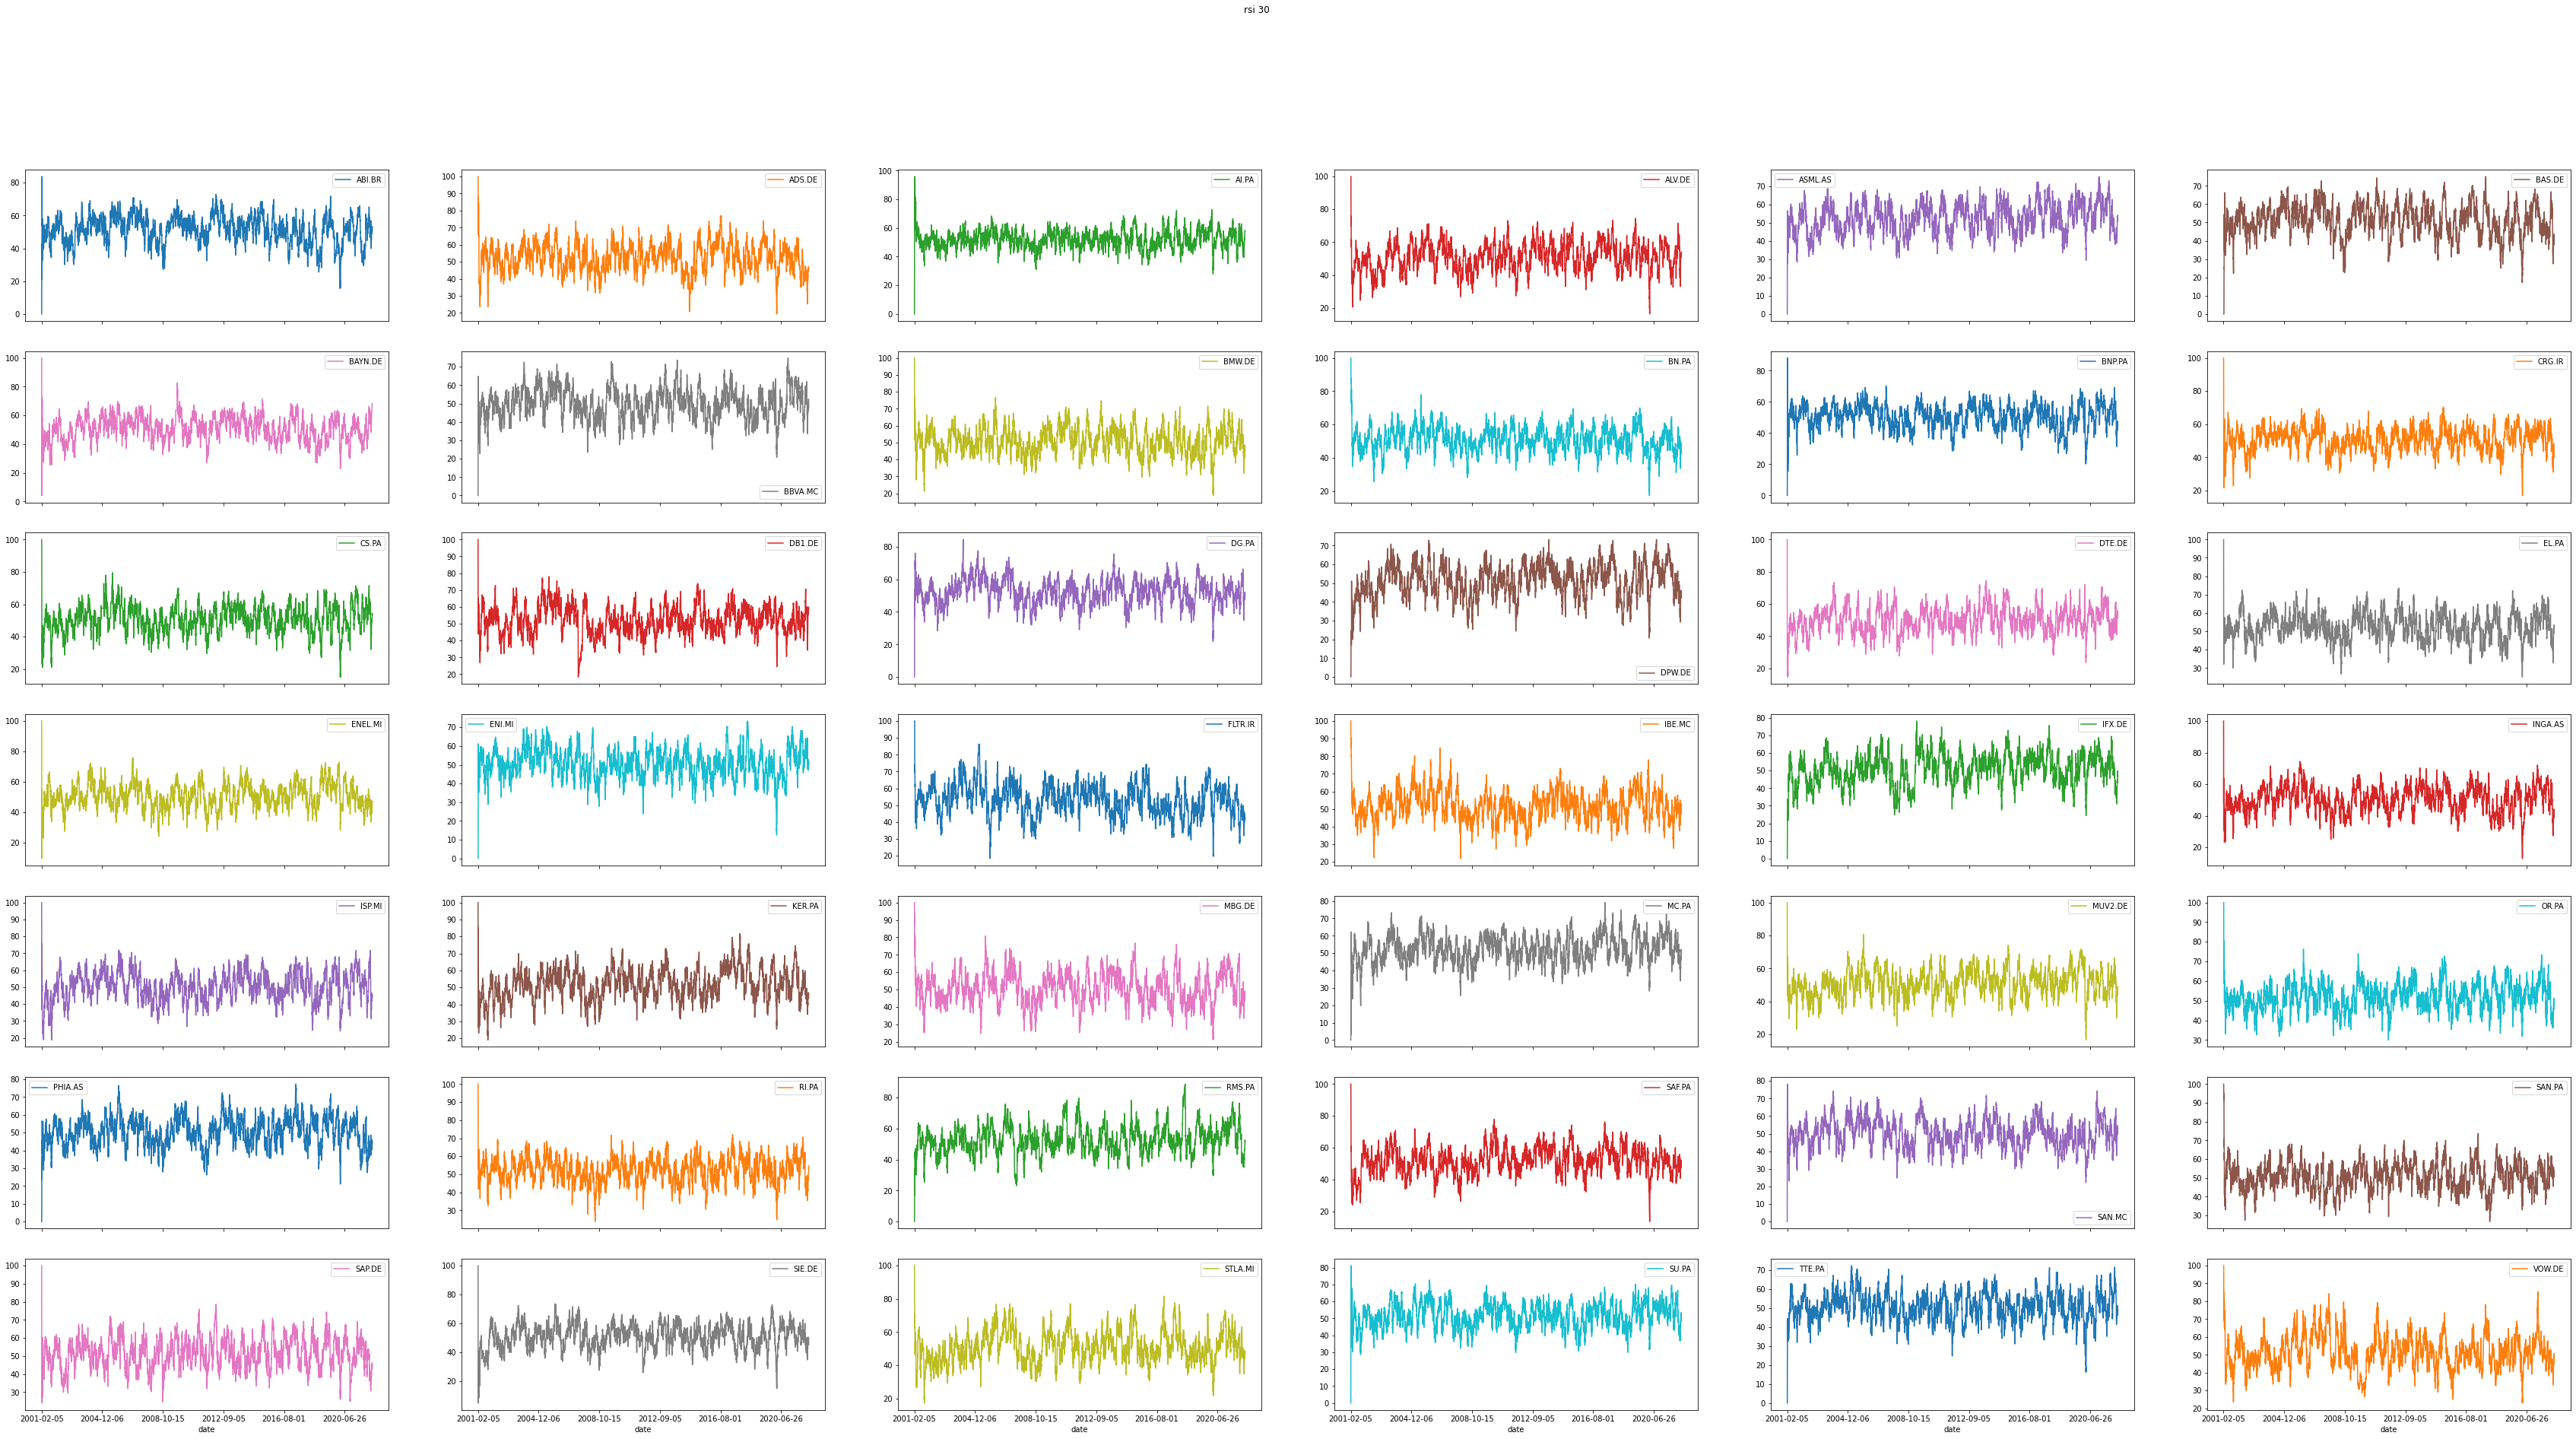

In [ ]:
dict_tech['rsi_30'].plot(subplots=True,layout=(7,6),figsize=(60,30),title='rsi 30')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9300ea8750>,
      dtype=object)

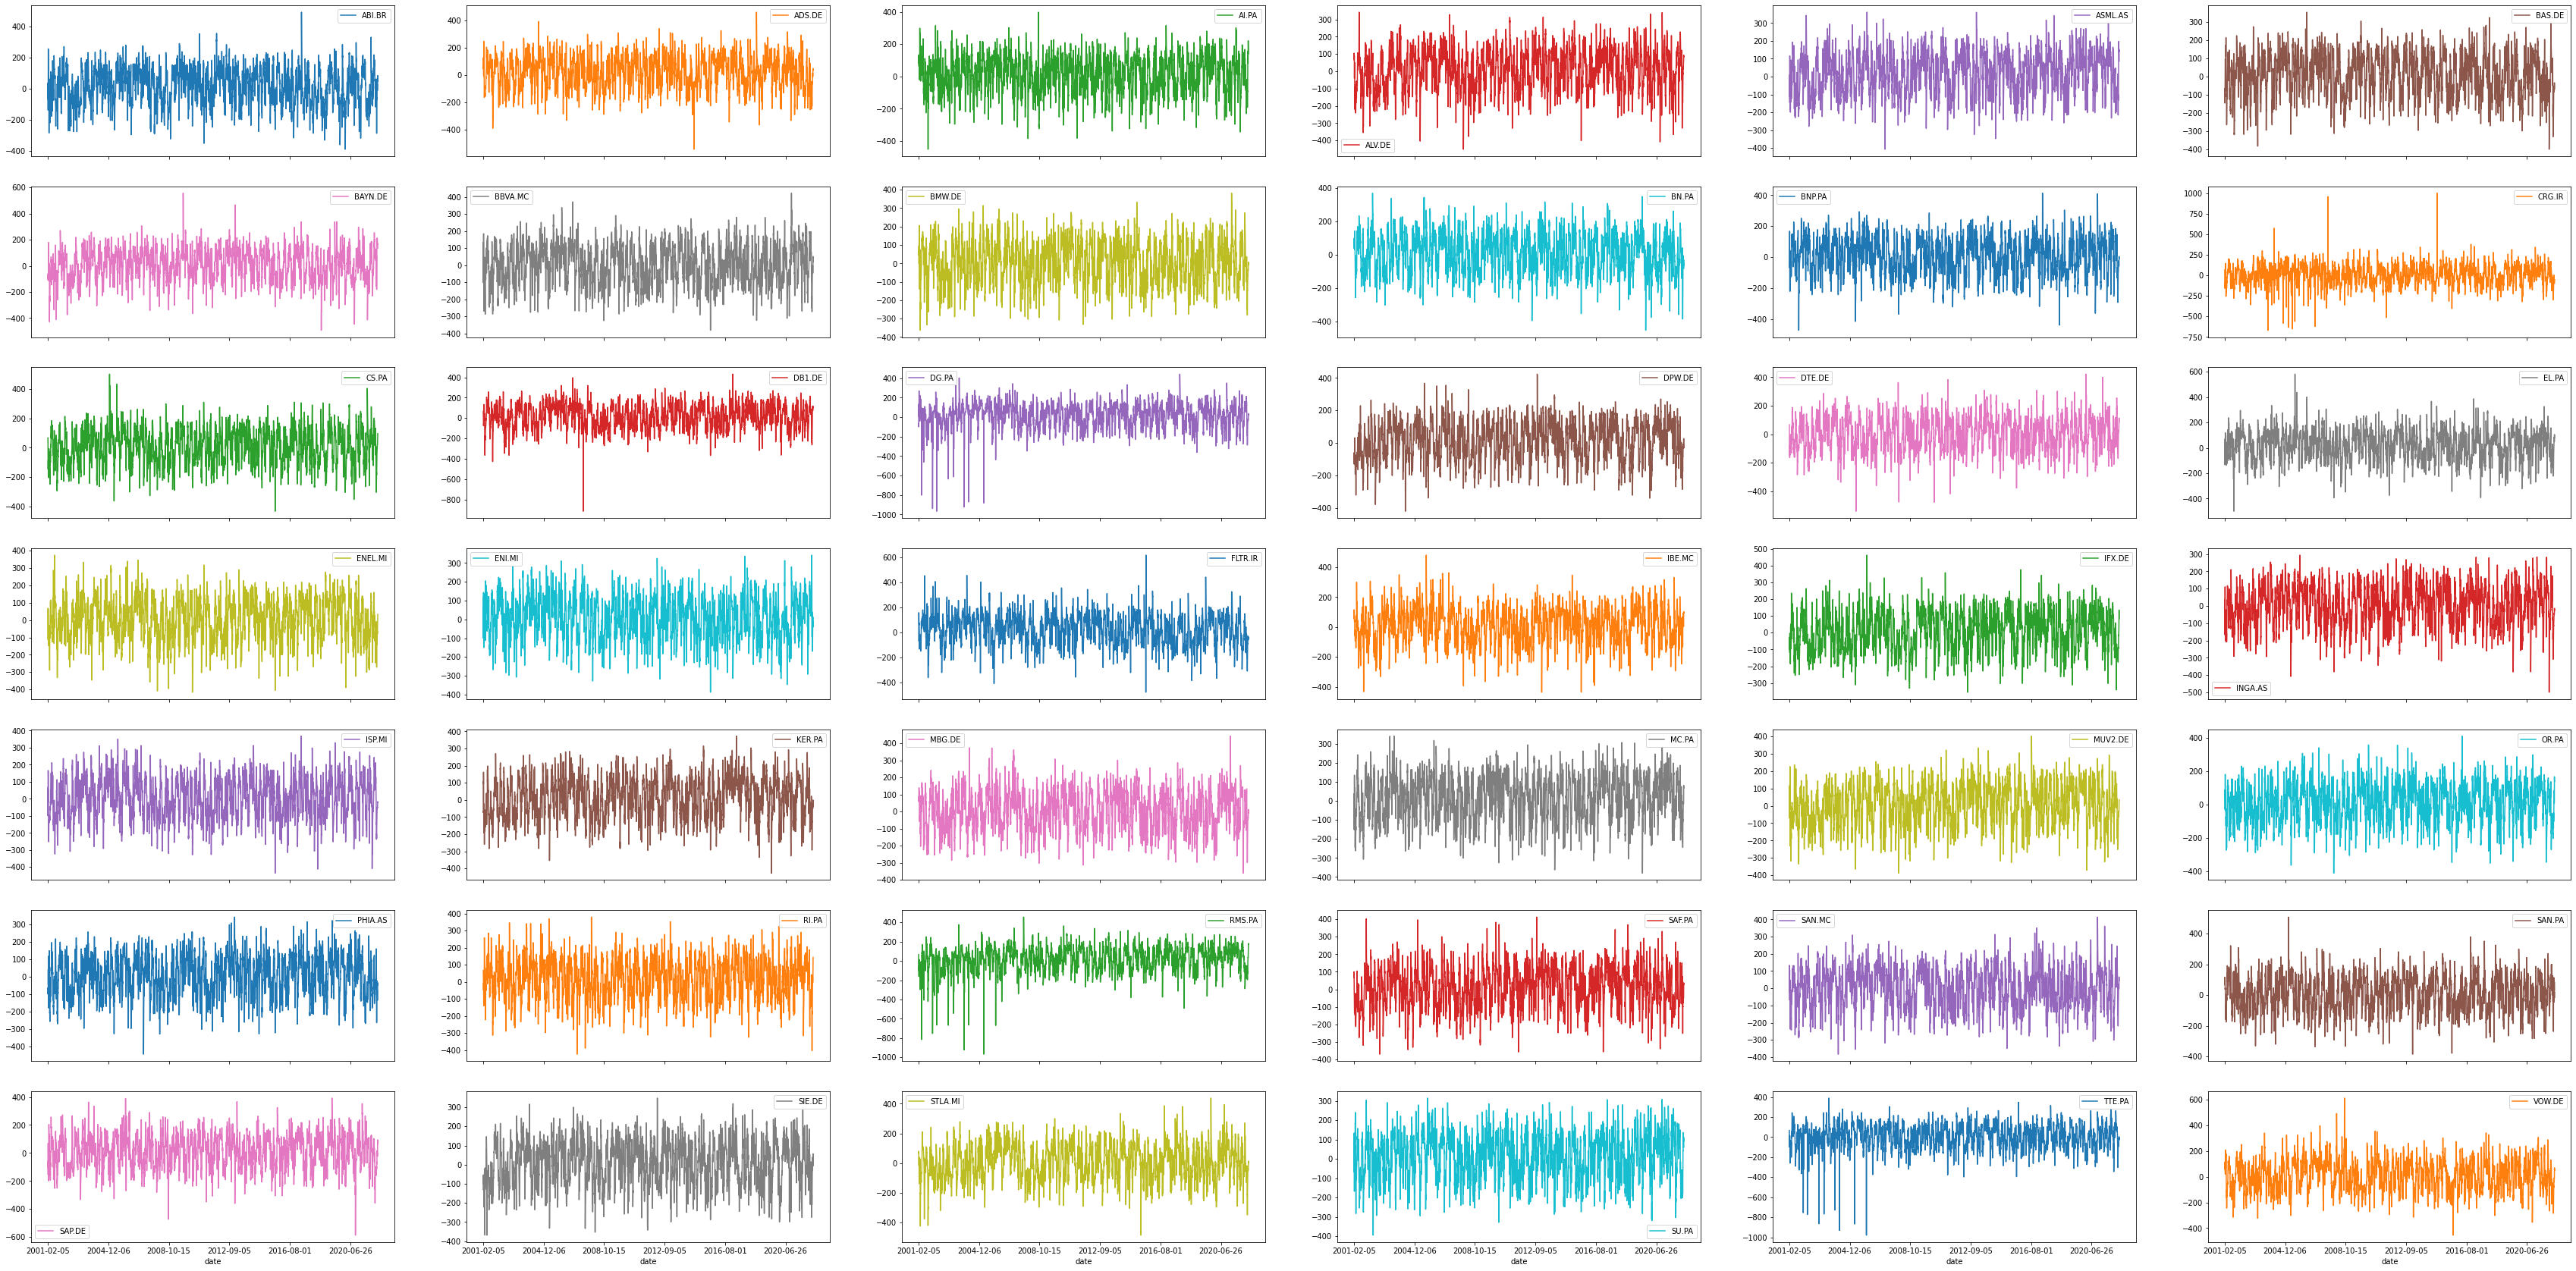

In [ ]:
dict_tech['cci_30'].plot(subplots=True,layout=(7,6),figsize=(60,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9300e32950>,
      dtype=object)

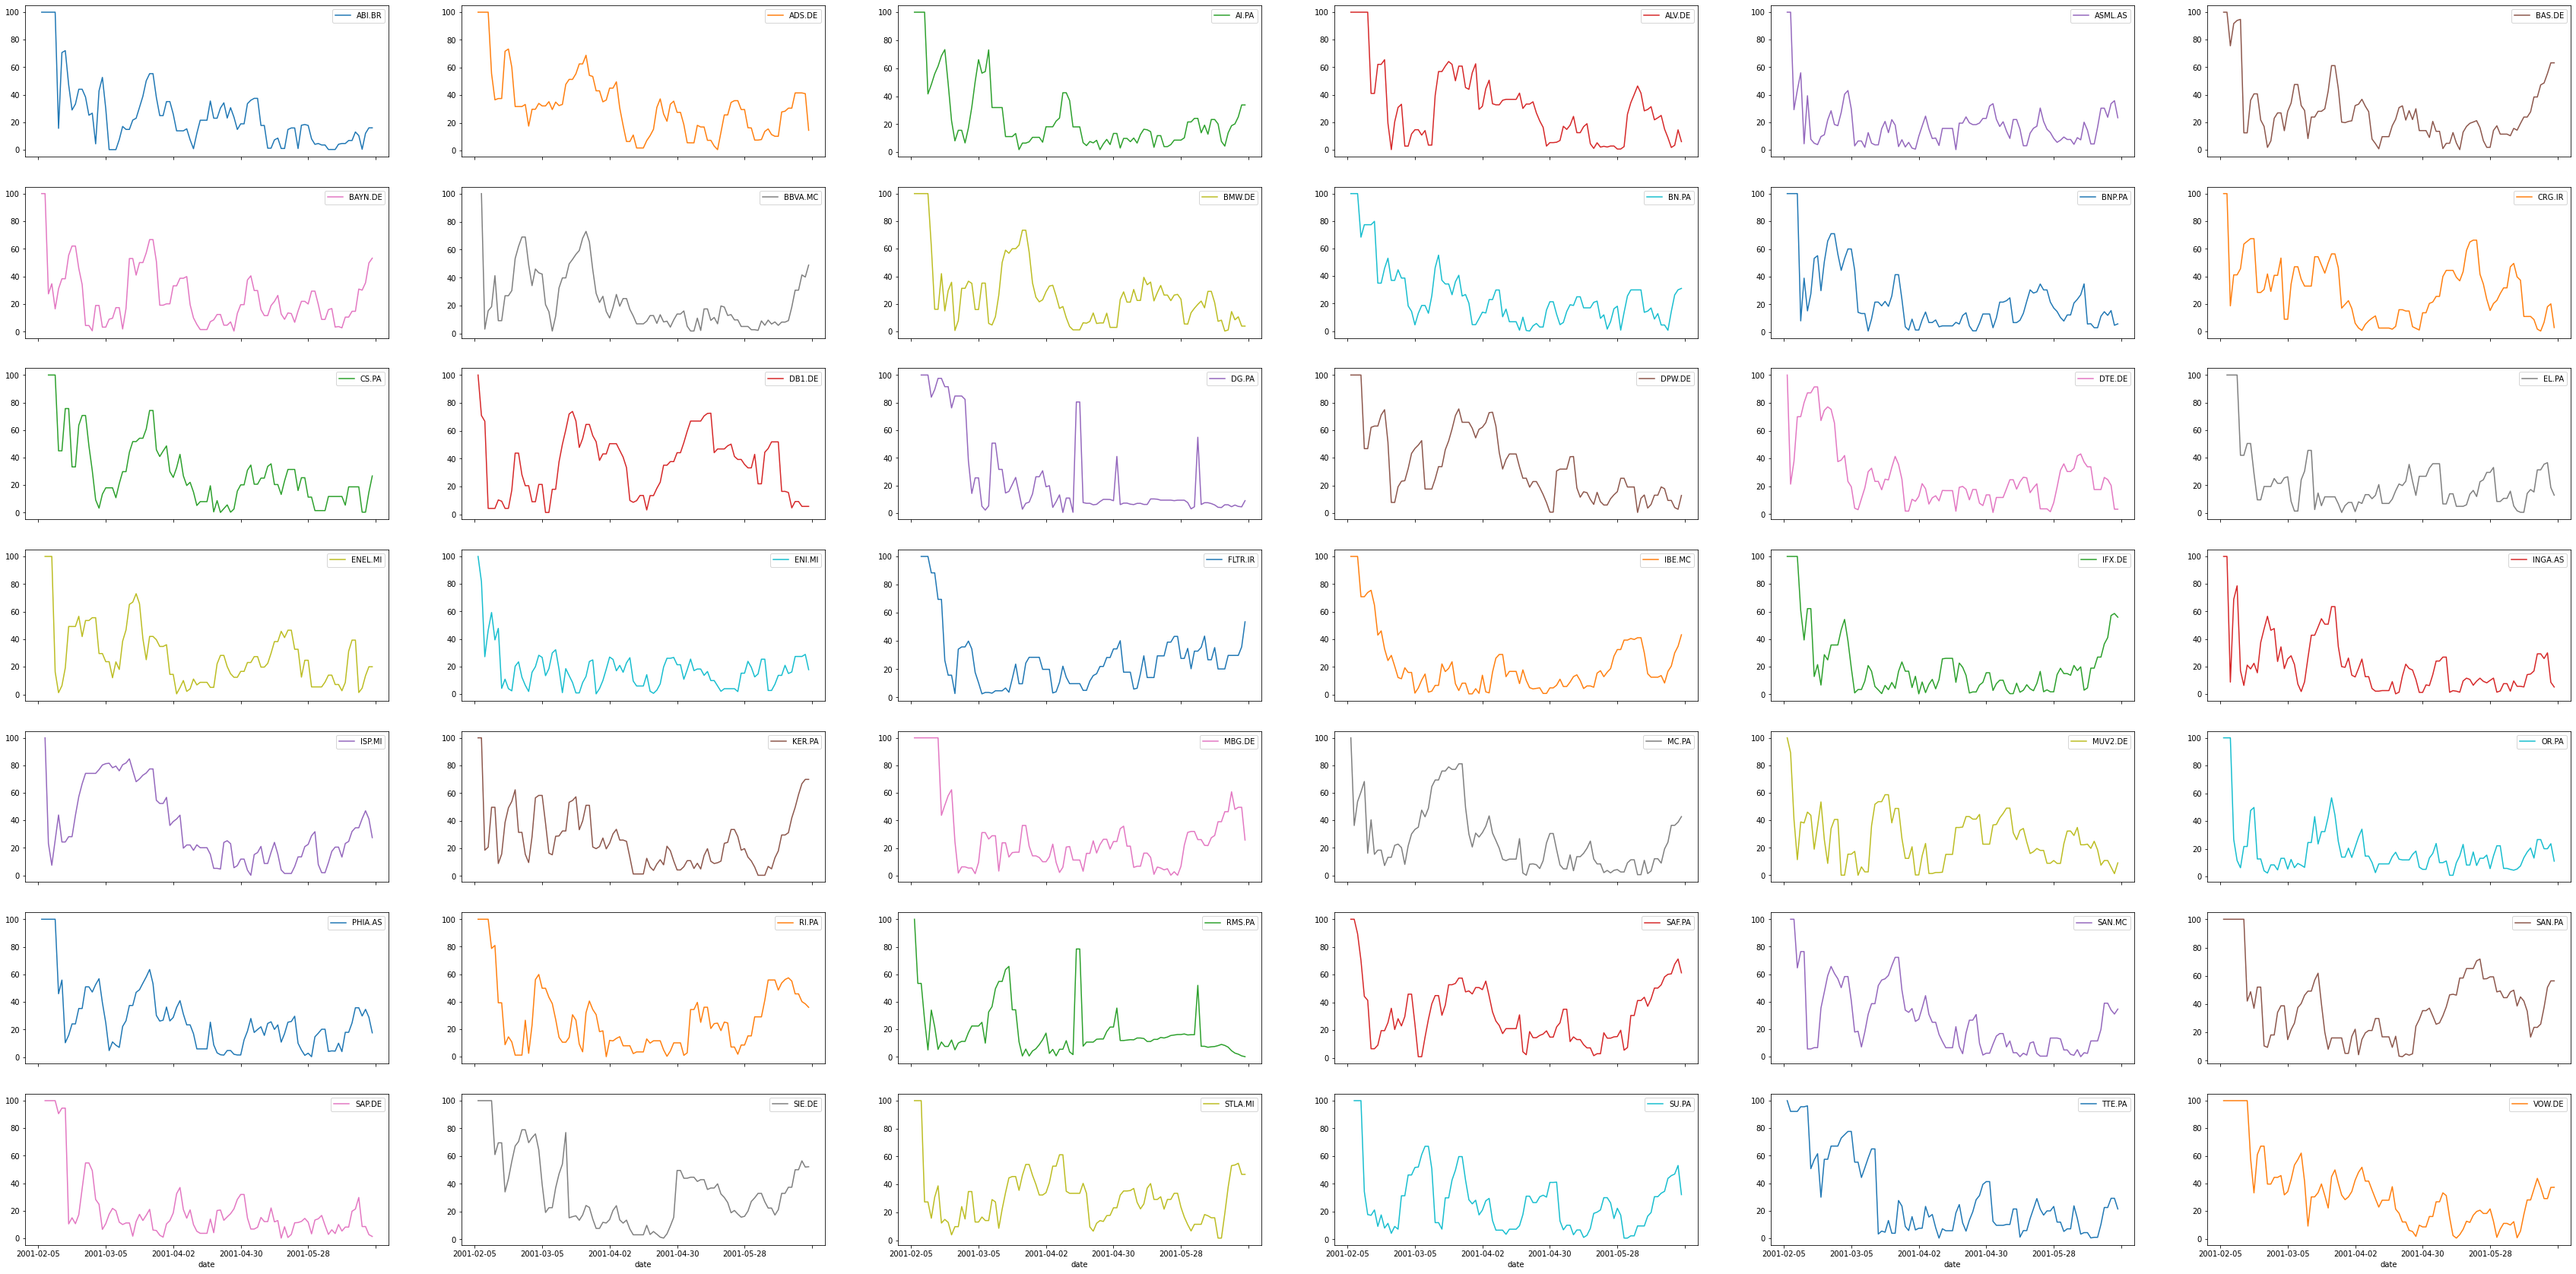

In [ ]:
dict_tech['dx_30'].iloc[:100].plot(subplots=True,layout=(7,6),figsize=(60,30))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92fe9f8150>,
      dtype=object)

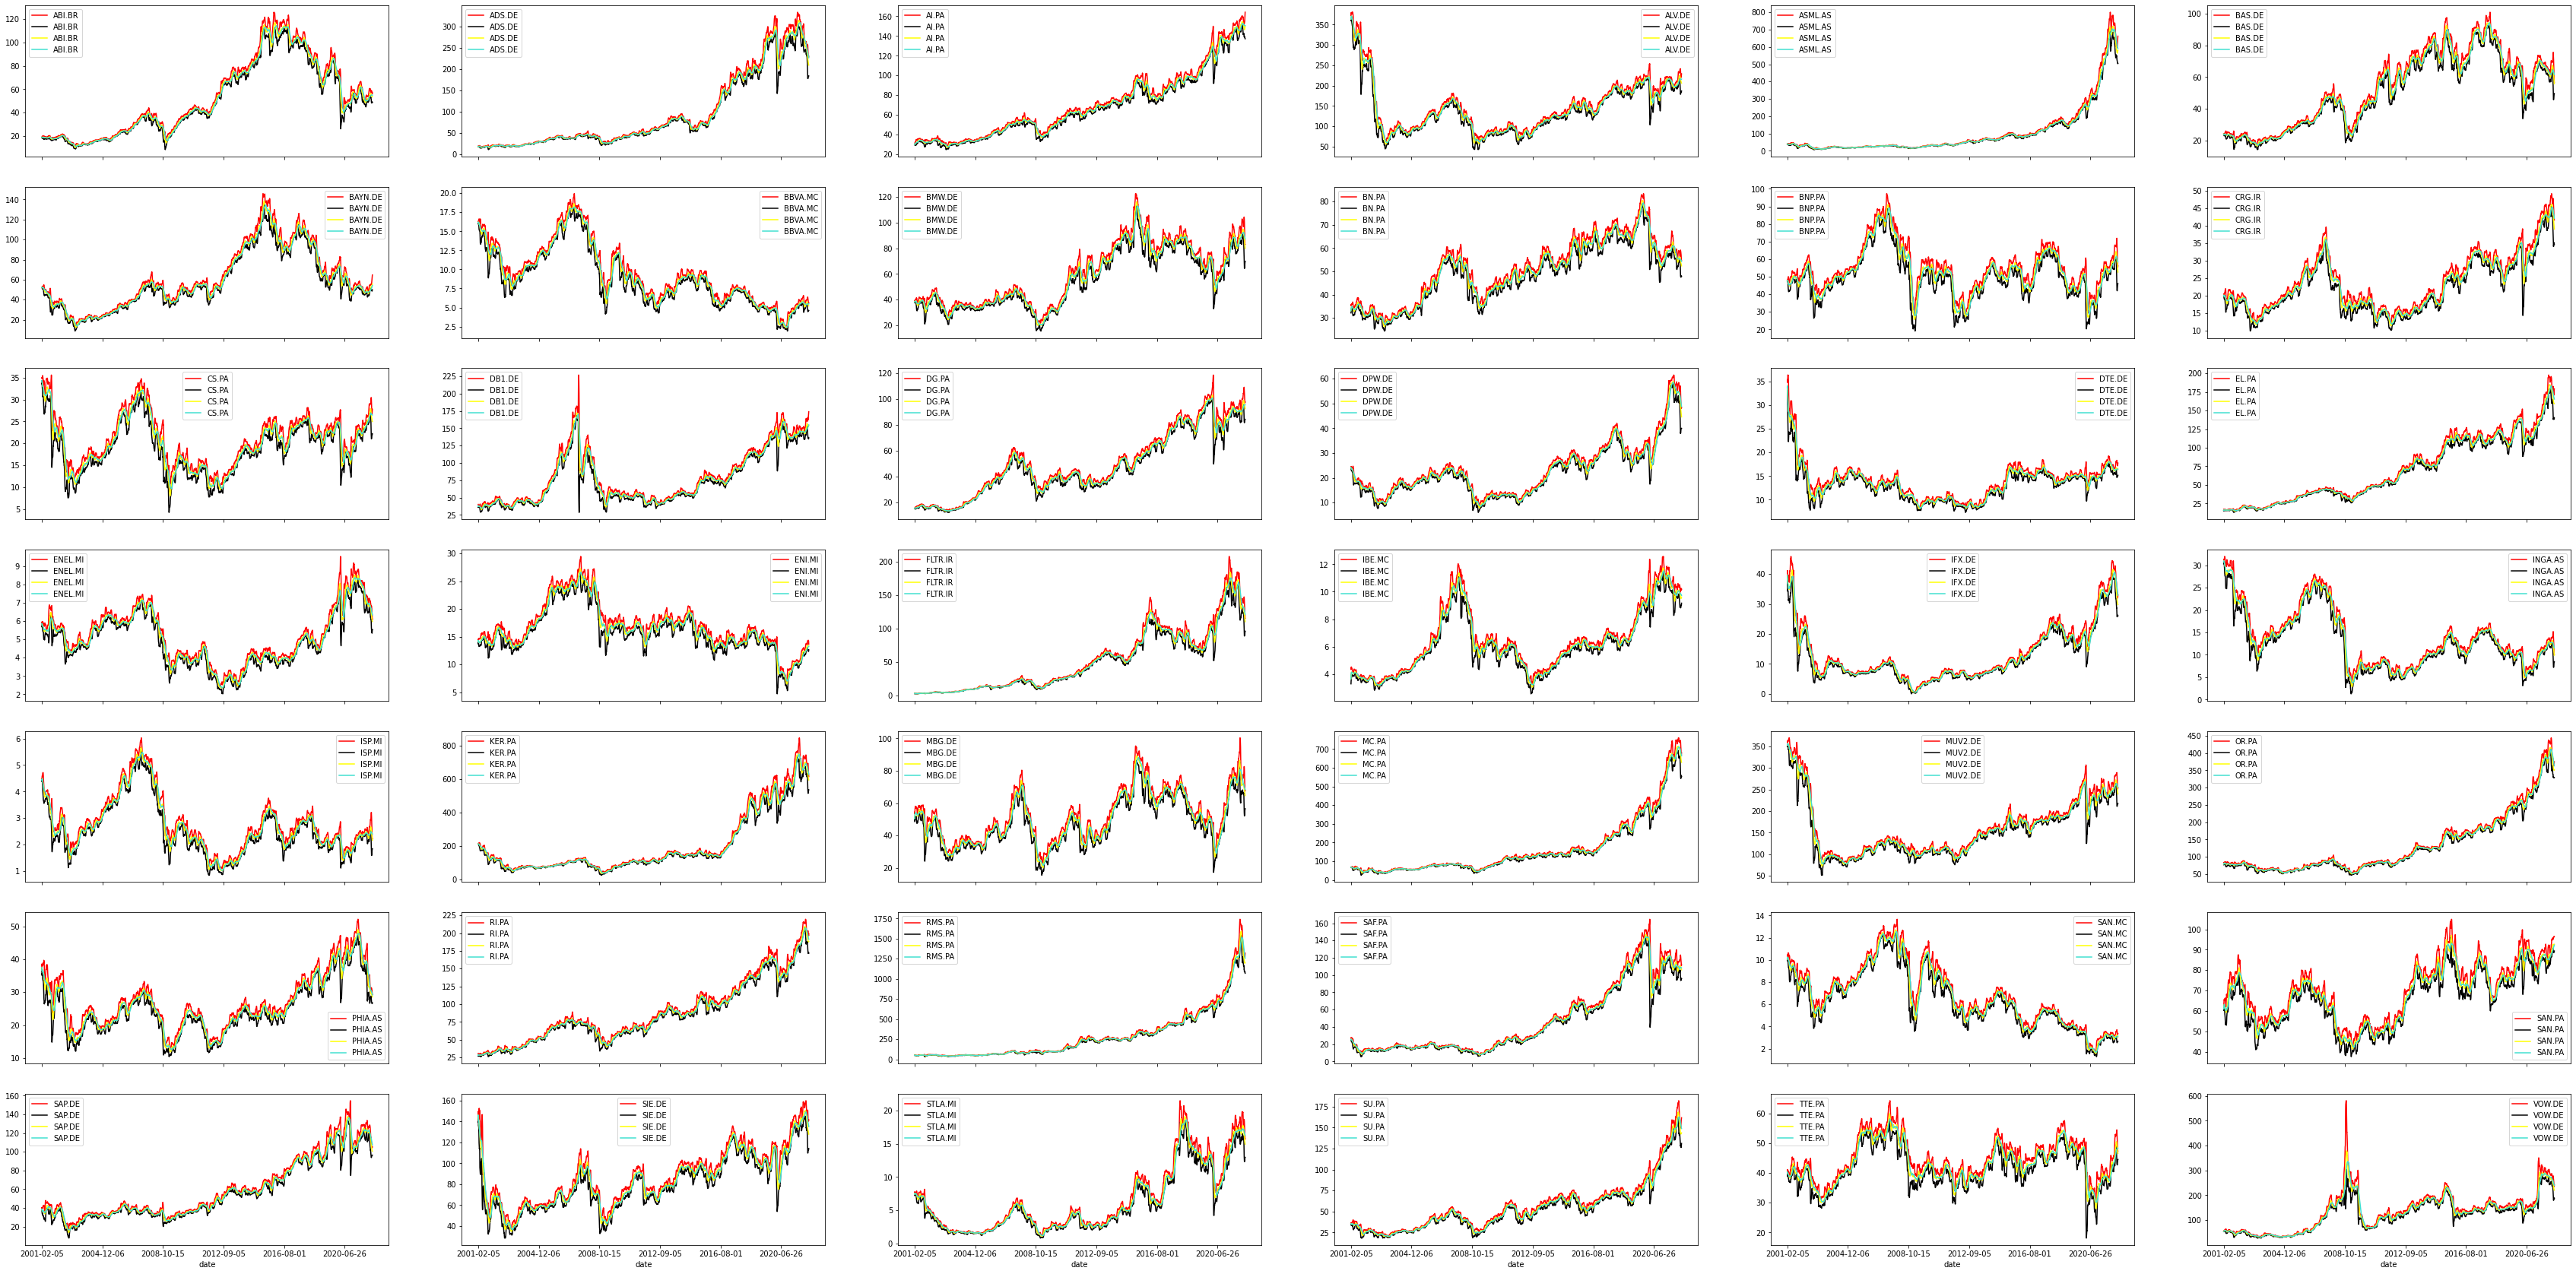

In [ ]:
ax_boll = dict_tech["boll_ub"].plot(subplots=True,color='red',layout=(7,6),figsize=(60,30))
dict_tech["boll_lb"].plot(subplots=True,color='black',layout=(7,6),figsize=(60,30),ax = ax_boll)
dict_tech['close_30_sma'].plot(subplots=True,color ='yellow',layout=(7,6),figsize=(60,30),ax = ax_boll)
dict_tech['close_60_sma'].plot(subplots=True,color='turquoise',layout=(7,6),figsize=(60,30),ax = ax_boll)

In [ ]:
# df.to_csv('Input/C_priceTA.csv',index=False)

In [ ]:
df

date      tic       close        open        high         low  \
0       2001-02-05   ABI.BR   18.880274   18.755239   18.880274   18.730232   
5456    2001-02-05   ADS.DE   17.487499   17.762501   17.844999   17.202499   
10912   2001-02-05    AI.PA   29.771391   29.667658   29.875126   29.501684   
16368   2001-02-05   ALV.DE  363.549988  367.000000  367.000000  361.170013   
21824   2001-02-05  ASML.AS   39.740253   41.069801   41.347397   39.287331   
...            ...      ...         ...         ...         ...         ...   
207327  2022-03-31   SIE.DE  125.660004  131.059998  131.699997  125.660004   
212783  2022-03-31  STLA.MI   14.800000   15.232000   15.318000   14.800000   
218239  2022-03-31    SU.PA  152.160004  153.440002  154.679993  151.619995   
223695  2022-03-31   TTE.PA   46.029999   46.435001   46.810001   45.910000   
229151  2022-03-31   VOW.DE  226.199997  237.000000  237.000000  225.600006   

             adjcp      volume      macd     boll_ub     boll_lb     rsi_30  \
0         3.025609    781132.0  0.000000         NaN         NaN        NaN   
5456     12.724095   8973536.0  0.000000         NaN         NaN        NaN   
10912    17.139208   1551457.0  0.000000         NaN         NaN        NaN   
16368   168.804565    515589.0  0.000000         NaN         NaN        NaN   
21824    31.509535  13651588.0  0.000000         NaN         NaN        NaN   
...            ...         ...       ...         ...         ...        ...   
207327  125.660004   2432448.0 -0.474735  141.749411  114.254590  45.081082   
212783   13.706353  11919513.0 -0.210901   15.704602   12.942398  46.242463   
218239  148.702362   1464407.0  2.136218  161.793211  131.120786  51.836633   
223695   46.029999   6495026.0 -0.360742   47.332580   44.574420  47.681294   
229151  217.620987     58036.0 -0.404579  242.309859  187.270139  47.422348   

           cci_30      dx_30  close_30_sma  close_60_sma  
0             NaN        NaN     18.880274     18.880274  
5456          NaN        NaN     17.487499     17.487499  
10912         NaN        NaN     29.771391     29.771391  
16368         NaN        NaN    363.549988    363.549988  
21824         NaN        NaN     39.740253     39.740253  
...           ...        ...           ...           ...  
207327  -4.476335  14.011704    127.999333    135.212001  
212783   1.967624   2.309290     14.925133     16.235800  
218239  92.505699  11.756476    143.780666    148.921666  
223695 -25.932913  16.824139     46.635666     48.429083  
229151  49.550837   0.274955    220.580000    239.780000  

[229152 rows x 16 columns]

Comment on TA's, close 60 sma needs 60 days to compute, so this dataframe is usable after 60 days. The covariance matrix has a lookback period of 252 days, the df will be providing the correct information.

#4. Add covariance matrix

For return and covairance we use adjusted close.

In [ ]:
#df = pd.read_csv('Input/priceTA.csv')

In [ ]:
# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
return_list = []

# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:] #subset the lookback period
  # price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close') # get closeprice
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'adjcp') # get closeprice
  return_lookback = price_lookback.pct_change().dropna() # generate return
  return_list.append(return_lookback)#append return list
  covs = return_lookback.cov().values # get cov of the returns
  cov_list.append(covs) # append cov

  
df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list,'return_list':return_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)

In [ ]:
print(df.shape)
df

(218568, 18)


date      tic       close        open        high         low  \
0       2002-01-23   ABI.BR   18.598946   18.223841   18.630203   18.205086   
1       2002-01-23   ADS.DE   19.975000   20.087500   20.200001   19.617500   
2       2002-01-23    AI.PA   32.157253   31.493361   32.489197   31.410374   
3       2002-01-23   ALV.DE  271.000000  262.500000  271.489990  260.000000   
4       2002-01-23  ASML.AS   30.155840   29.659086   30.170450   29.220776   
...            ...      ...         ...         ...         ...         ...   
218563  2022-03-31   SIE.DE  125.660004  131.059998  131.699997  125.660004   
218564  2022-03-31  STLA.MI   14.800000   15.232000   15.318000   14.800000   
218565  2022-03-31    SU.PA  152.160004  153.440002  154.679993  151.619995   
218566  2022-03-31   TTE.PA   46.029999   46.435001   46.810001   45.910000   
218567  2022-03-31   VOW.DE  226.199997  237.000000  237.000000  225.600006   

             adjcp      volume      macd     boll_ub     boll_lb     rsi_30  \
0         3.001536    389695.0  0.067984   19.285775   17.797708  53.773292   
1        14.735347   1190196.0  0.097690   21.483986   19.817514  53.209759   
2        18.903681   1335470.0 -0.195957   33.456457   30.656806  49.906022   
3       126.412605    916741.0  0.702347  272.280826  253.765176  53.504092   
4        23.910179   4020700.0  0.294930   34.246904   27.102113  51.738204   
...            ...         ...       ...         ...         ...        ...   
218563  125.660004   2432448.0 -0.474735  141.749411  114.254590  45.081082   
218564   13.706353  11919513.0 -0.210901   15.704602   12.942398  46.242463   
218565  148.702362   1464407.0  2.136218  161.793211  131.120786  51.836633   
218566   46.029999   6495026.0 -0.360742   47.332580   44.574420  47.681294   
218567  217.620987     58036.0 -0.404579  242.309859  187.270139  47.422348   

            cci_30      dx_30  close_30_sma  close_60_sma  \
0        39.247792  21.059495     18.317408     18.168617   
1      -102.546131   6.541993     20.491500     19.276208   
2       -12.379586  23.854377     32.090172     32.294180   
3       107.709827   7.736951    260.410334    263.995000   
4        -8.537955   4.039033     30.011684     29.620126   
...            ...        ...           ...           ...   
218563   -4.476335  14.011704    127.999333    135.212001   
218564    1.967624   2.309290     14.925133     16.235800   
218565   92.505699  11.756476    143.780666    148.921666   
218566  -25.932913  16.824139     46.635666     48.429083   
218567   49.550837   0.274955    220.580000    239.780000   

                                                 cov_list  \
0       [[0.00035645935731345047, 1.9861835902802778e-...   
1       [[0.00035645935731345047, 1.9861835902802778e-...   
2       [[0.00035645935731345047, 1.9861835902802778e-...   
3       [[0.00035645935731345047, 1.9861835902802778e-...   
4       [[0.00035645935731345047, 1.9861835902802778e-...   
...                                                   ...   
218563  [[0.000331982073908074, 0.000146361221426952, ...   
218564  [[0.000331982073908074, 0.000146361221426952, ...   
218565  [[0.000331982073908074, 0.000146361221426952, ...   
218566  [[0.000331982073908074, 0.000146361221426952, ...   
218567  [[0.000331982073908074, 0.000146361221426952, ...   

                                              return_list  
0       tic           ABI.BR    ADS.DE     AI.PA    AL...  
1       tic           ABI.BR    ADS.DE     AI.PA    AL...  
2       tic           ABI.BR    ADS.DE     AI.PA    AL...  
3       tic           ABI.BR    ADS.DE     AI.PA    AL...  
4       tic           ABI.BR    ADS.DE     AI.PA    AL...  
...                                                   ...  
218563  tic           ABI.BR    ADS.DE     AI.PA    AL...  
218564  tic           ABI.BR    ADS.DE     AI.PA    AL...  
218565  tic           ABI.BR    ADS.DE     AI.PA    AL...  
218566  tic           ABI.BR    ADS.DE     AI.PA  

In [ ]:
# df.to_pickle("Input/C_cleanInput.pkl")

In [ ]:
df=pd.read_pickle("Input/C_cleanInput.pkl")
df=df.sort_values(['tic','date'],ignore_index=True)
df.index = df.date.factorize()[0]
df

date     tic       close        open        high         low  \
0     2002-01-23  ABI.BR   18.598946   18.223841   18.630203   18.205086   
1     2002-01-24  ABI.BR   18.473911   18.692722   18.817757   18.473911   
2     2002-01-25  ABI.BR   18.698975   18.692722   18.723982   18.417645   
3     2002-01-28  ABI.BR   18.630203   18.692722   18.711477   18.573938   
4     2002-01-29  ABI.BR   18.536428   18.711477   18.755239   18.455154   
...          ...     ...         ...         ...         ...         ...   
5199  2022-03-25  VOW.DE  218.000000  224.000000  224.000000  217.800003   
5200  2022-03-28  VOW.DE  221.800003  220.199997  224.800003  220.000000   
5201  2022-03-29  VOW.DE  238.399994  226.000000  240.000000  222.600006   
5202  2022-03-30  VOW.DE  234.000000  238.000000  238.399994  231.199997   
5203  2022-03-31  VOW.DE  226.199997  237.000000  237.000000  225.600006   

           adjcp    volume      macd     boll_ub     boll_lb     rsi_30  \
0       3.058174  389695.0  0.067984   19.285775   17.797708  53.773292   
1       3.037615  470075.0  0.068611   19.196608   17.819982  52.592885   
2       3.074622  270398.0  0.086274   19.090850   17.873226  54.454580   
3       3.063314  175555.0  0.093644   18.957938   17.946746  53.786901   
4       3.047894  291371.0  0.090870   18.773963   18.061952  52.872442   
...          ...       ...       ...         ...         ...        ...   
5199  218.000000   29739.0 -4.224110  237.435552  188.384447  44.609989   
5200  221.800003   35109.0 -3.615814  234.859731  189.620269  45.841742   
5201  238.399994   69686.0 -1.773807  238.712885  187.887115  50.787313   
5202  234.000000   40572.0 -0.661421  241.109952  187.110047  49.546706   
5203  226.199997   58036.0 -0.404579  242.309859  187.270139  47.422348   

         cci_30      dx_30  close_30_sma  close_60_sma  \
0     39.247792  21.059495     18.317408     18.168617   
1     57.670638  28.422232     18.351793     18.186747   
2     58.378694  24.692559     18.391387     18.198313   
3     59.205979  24.692559     18.428898     18.199876   
4     38.860357  16.528683     18.465366     18.201126   
...         ...        ...           ...           ...   
5199 -17.620594  13.519576    223.220000    242.640000   
5200  -4.327159  12.360737    222.600000    241.910000   
5201  57.962503   6.934727    222.033333    241.326667   
5202  69.396814   6.934727    221.373333    240.570000   
5203  49.550837   0.274955    220.580000    239.780000   

                                               cov_list  \
0     [[0.0003564597533219459, 1.9862244066769915e-0...   
1     [[0.0003564991630535469, 2.0628345414887326e-0...   
2     [[0.0003570059198400737, 2.064716454681769e-05...   
3     [[0.0003569593889419091, 2.1190862827374488e-0...   
4     [[0.00035696076941124584, 2.1840185587457404e-...   
...                                                 ...   
5199  [[0.0003299393375356121, 0.0001443419776720916...   
5200  [[0.00032865823295607713, 0.000142628624341265...   
5201  [[0.00033125725128733215, 0.000144903987236492...   
5202  [[0.0003314908558637332, 0.0001451600012155714...   
5203  [[0.00033198200077428226, 0.000146361274132923...   

                                            return_list  
0     tic           ABI.BR    ADS.DE     AI.PA    AL...  
1     tic           ABI.BR    ADS.DE     AI.PA    AL...  
2     tic           ABI.BR    ADS.DE     AI.PA    AL...  
3     tic           ABI.BR    ADS.DE     AI.PA    AL...  
4     tic           ABI.BR    ADS.DE     AI.PA    AL...  
...                                                 ...  
5199  tic           ABI.BR    ADS.DE     AI.PA    AL...  
5200  tic           ABI.BR    ADS.DE     AI.PA    AL...  
5201  tic           ABI.BR    ADS.DE     AI.PA    AL...  
5202  tic           ABI.BR    ADS.DE     AI.PA    AL...  
5203  tic           ABI.BR    ADS.DE     AI.PA    AL...  

[218568 rows x 18 columns]

## Return Matrix

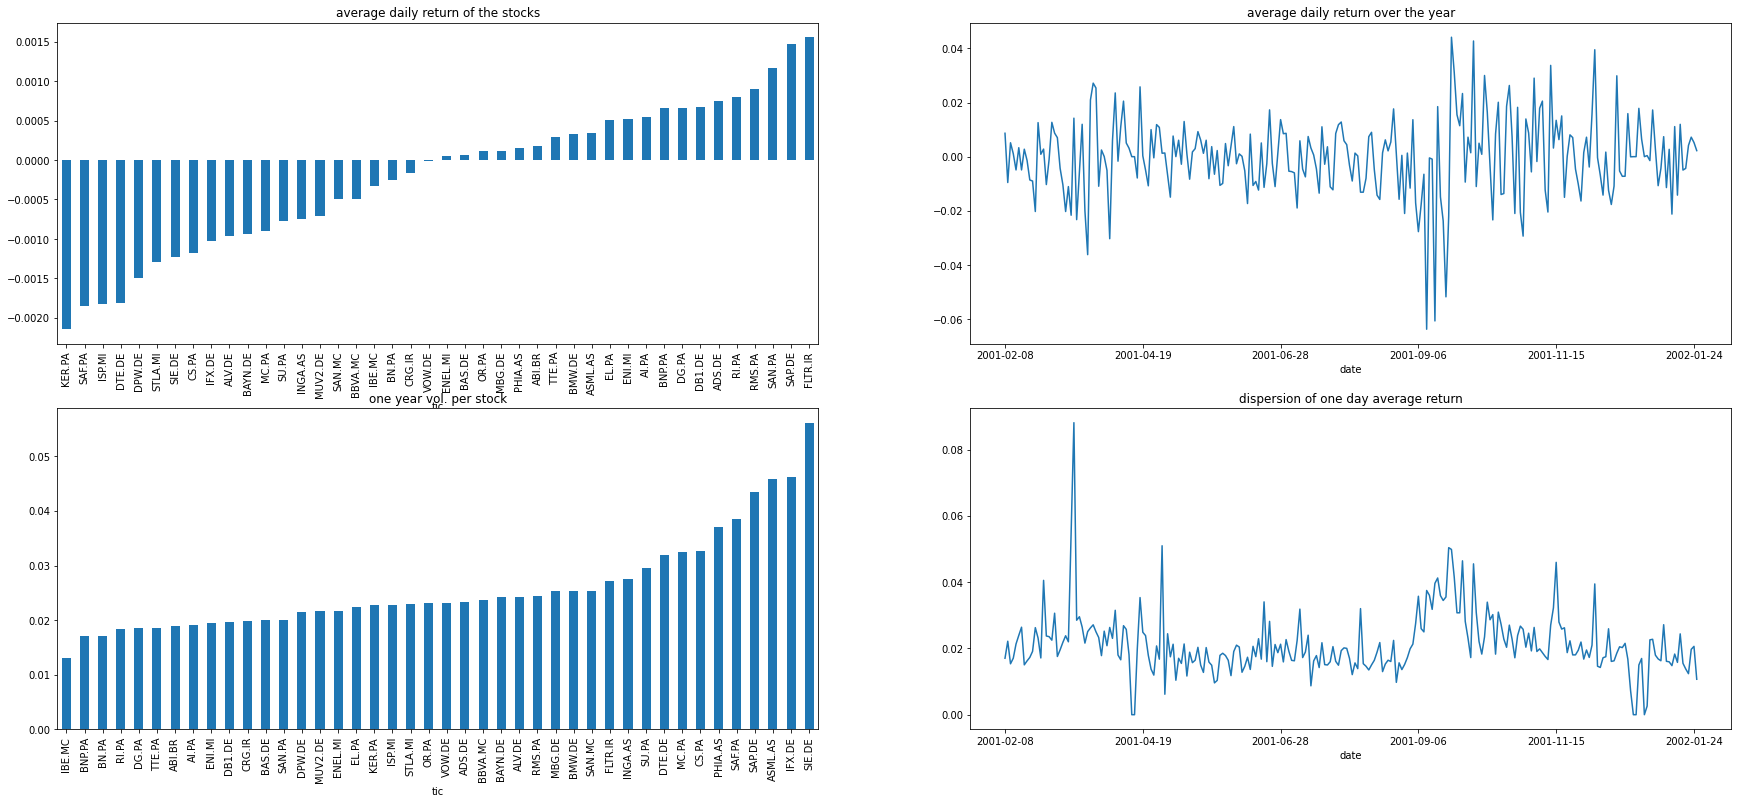

In [ ]:
# state
import matplotlib.pyplot as plt
aday = 2
data = df.loc[aday,:]
returnM = data.iloc[0]['return_list']

# plot the info that the state contains
fig = plt.figure(figsize=(30,13))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
returnM.mean(axis=0).sort_values().plot.bar(title = 'average daily return of the stocks' ,ax=ax1)
returnM.mean(axis=1).plot(title = 'average daily return over the year',ax=ax2 ) # 
returnM.std(axis=0).sort_values().plot.bar(title = 'one year vol. per stock', ax=ax3 ) 
returnM.std(axis=1).plot(title = 'dispersion of one day average return',ax = ax4) 

## covariance matrix

In [ ]:
returnM.cov()

tic        ABI.BR    ADS.DE     AI.PA    ALV.DE   ASML.AS    BAS.DE   BAYN.DE  \
tic                                                                             
ABI.BR   0.000357  0.000021  0.000045  0.000031  0.000089  0.000013  0.000039   
ADS.DE   0.000021  0.000539  0.000094  0.000131  0.000302  0.000188  0.000188   
AI.PA    0.000045  0.000094  0.000363  0.000161  0.000319  0.000150  0.000155   
ALV.DE   0.000031  0.000131  0.000161  0.000591  0.000486  0.000261  0.000259   
ASML.AS  0.000089  0.000302  0.000319  0.000486  0.002110  0.000379  0.000328   
BAS.DE   0.000013  0.000188  0.000150  0.000261  0.000379  0.000399  0.000344   
BAYN.DE  0.000039  0.000188  0.000155  0.000259  0.000328  0.000344  0.000590   
BBVA.MC  0.000059  0.000132  0.000231  0.000312  0.000587  0.000238  0.000257   
BMW.DE   0.000017  0.000221  0.000153  0.000239  0.000414  0.000229  0.000222   
BN.PA    0.000052  0.000081  0.000078  0.000133  0.000139  0.000090  0.000089   
BNP.PA   0.000049  0.000120  0.000162  0.000231  0.000405  0.000190  0.000169   
CRG.IR  -0.000018  0.000076  0.000070  0.000034  0.000088  0.000061  0.000021   
CS.PA    0.000066  0.000218  0.000284  0.000436  0.000653  0.000304  0.000334   
DB1.DE   0.000012  0.000087  0.000114  0.000161  0.000235  0.000146  0.000141   
DG.PA    0.000003  0.000033  0.000051  0.000095  0.000093  0.000092  0.000089   
DPW.DE   0.000068  0.000104  0.000024  0.000176  0.000128  0.000100  0.000099   
DTE.DE   0.000076  0.000112  0.000228  0.000371  0.000719  0.000283  0.000340   
EL.PA   -0.000034  0.000040  0.000026  0.000015  0.000031  0.000058  0.000031   
ENEL.MI  0.000006  0.000080  0.000120  0.000263  0.000284  0.000148  0.000133   
ENI.MI   0.000028  0.000065  0.000128  0.000200  0.000147  0.000165  0.000139   
FLTR.IR  0.000036  0.000074  0.000013  0.000035  0.000105  0.000076  0.000059   
IBE.MC   0.000027  0.000054  0.000046  0.000079  0.000074  0.000046  0.000045   
IFX.DE   0.000011  0.000282  0.000264  0.000404  0.001286  0.000309  0.000354   
INGA.AS  0.000095  0.000155  0.000237  0.000460  0.000667  0.000311  0.000308   
ISP.MI   0.000015  0.000191  0.000167  0.000275  0.000445  0.000239  0.000226   
KER.PA   0.000043  0.000181  0.000157  0.000197  0.000538  0.000191  0.000173   
MBG.DE   0.000052  0.000226  0.000194  0.000331  0.000610  0.000283  0.000283   
MC.PA    0.000075  0.000176  0.000318  0.000365  0.000859  0.000317  0.000350   
MUV2.DE  0.000041  0.000141  0.000159  0.000409  0.000350  0.000177  0.000179   
OR.PA    0.000055  0.000136  0.000193  0.000292  0.000435  0.000188  0.000208   
PHIA.AS  0.000083  0.000248  0.000273  0.000443  0.001346  0.000334  0.000321   
RI.PA    0.000010 -0.000007  0.000089  0.000160  0.000103  0.000101  0.000071   
RMS.PA   0.000012  0.000131  0.000149  0.000220  0.000422  0.000176  0.000140   
SAF.PA   0.000098  0.000123  0.000139  0.000266  0.000772  0.000146  0.000241   
SAN.MC   0.000052  0.000134  0.000241  0.000345  0.000635  0.000267  0.000280   
SAN.PA   0.000053  0.000100  0.000129  0.000169  0.000253  0.000122  0.000090   
SAP.DE   0.000061  0.000256  0.000204  0.000418  0.001088  0.000359  0.000318   
SIE.DE   0.000063  0.000301  0.000192  0.000422  0.000915  0.000412  0.000433   
STLA.MI  0.000035  0.000123  0.000148  0.000156  0.000362  0.000166  0.000144   
SU.PA    0.000049  0.000189  0.000147  0.000174  0.000552  0.000156  0.000149   
TTE.PA   0.000034  0.000100  0.000124  0.000200  0.000240  0.000166  0.000164   
VOW.DE   0.000035  0.000227  0.000130  0.000251  0.000489  0.000238  0.000208   

tic       BBVA.MC    BMW.DE     BN.PA  ...    RMS.PA    SAF.PA    SAN.MC  \
tic                                    ...                                 
ABI.BR   0.000059  0.000017  0.000052  ...  0.000012  0.000098  0.000052   
ADS.DE   0.000132  0.000221  0.000081  ...  0.000131  0.000123  0.000134   
AI.PA    0.000231  0.000153  0.000078  ...  0.000149  0.000139  0.000241   
ALV.DE   0.000312  0.000239  0.000133  ...  0.000220  0

In [ ]:
aday = 2
data = df.loc[aday,:]
cov = pd.DataFrame(data.iloc[0]['cov_list'])

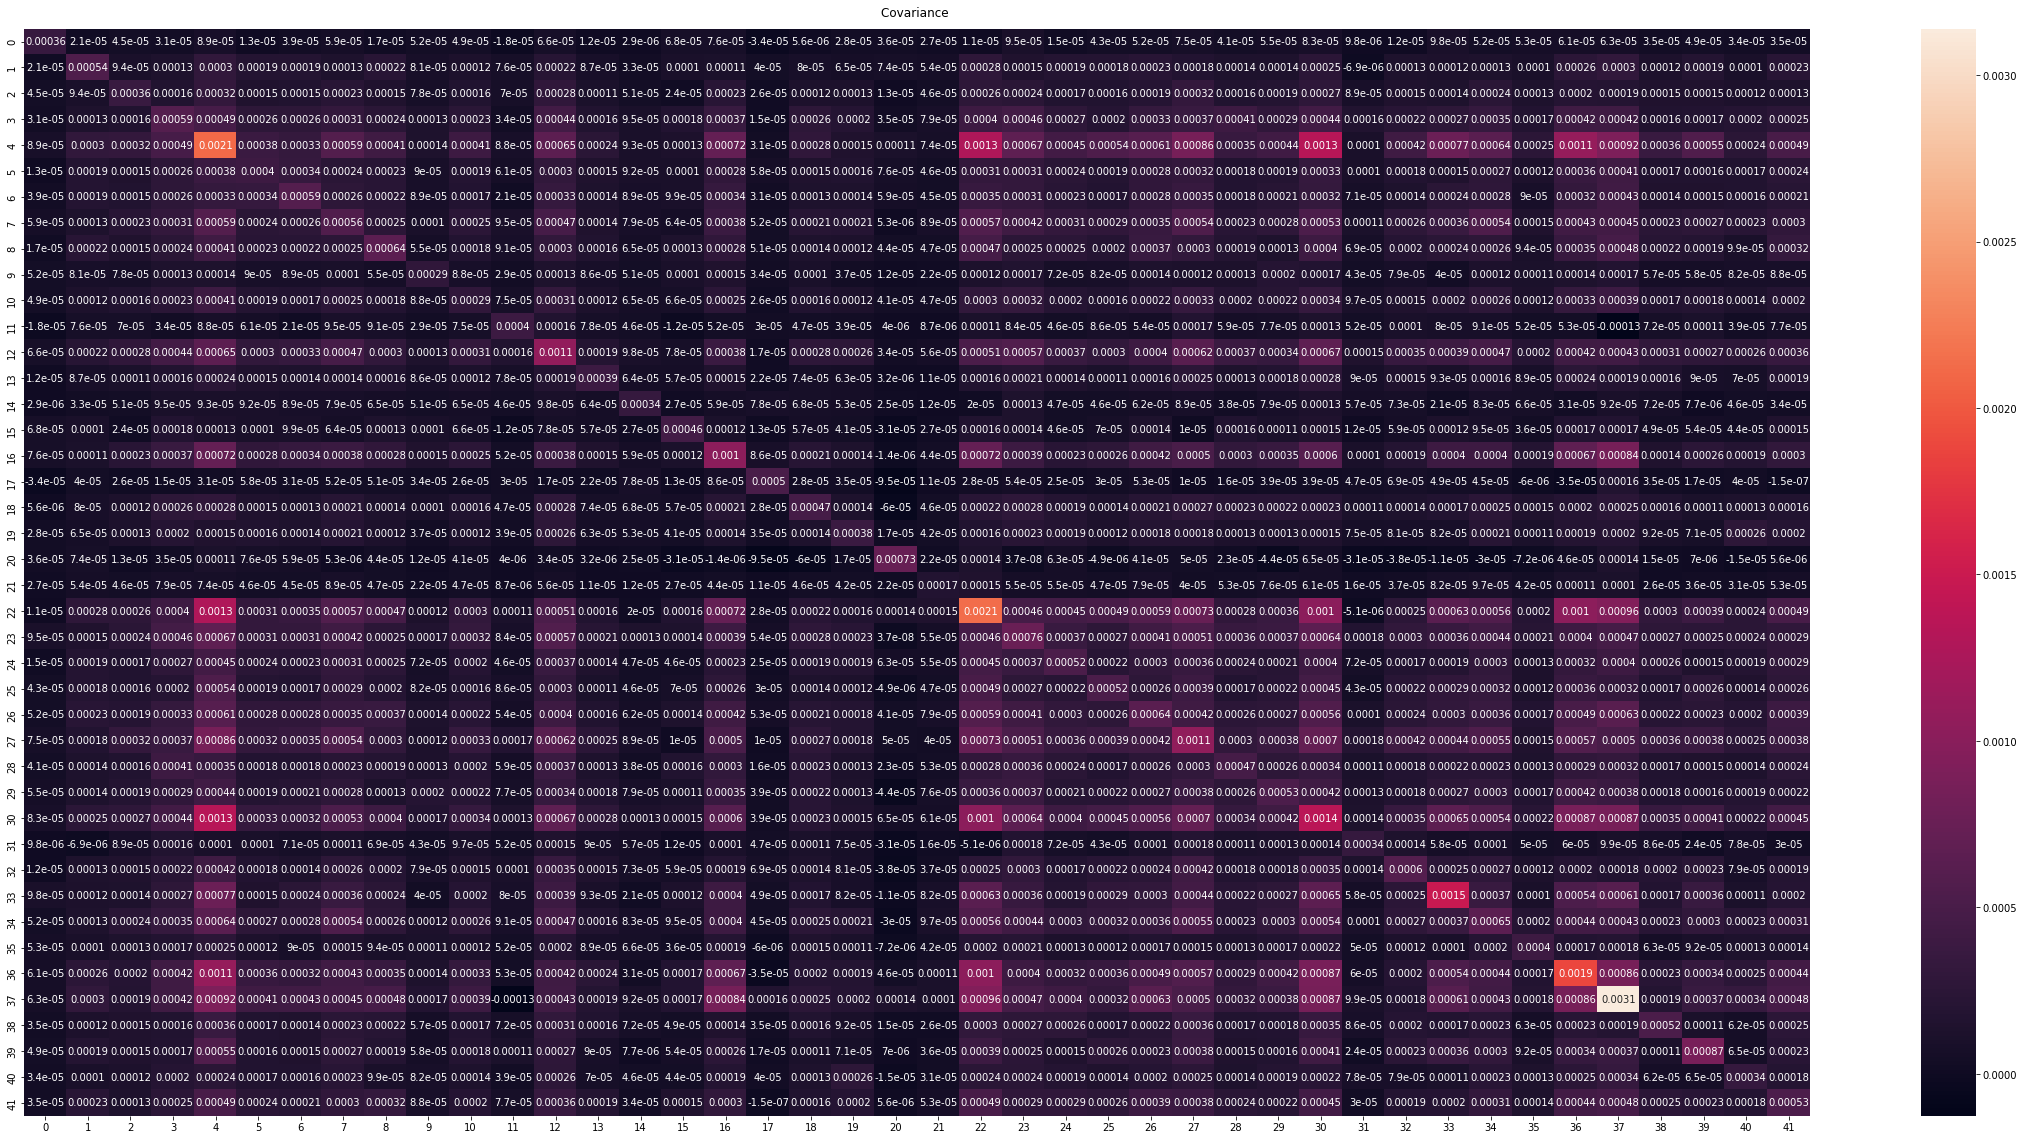

In [ ]:
import seaborn as sns

plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(cov,  annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Covariance ', fontdict={'fontsize':12}, pad=12);

## Annulized returns 

In [ ]:
df=pd.read_pickle("Input/C_cleanInput.pkl")
df=df.sort_values(['tic','date'],ignore_index=True) # index range 0:218567

In [ ]:
df.head()

date     tic      close       open       high        low     adjcp  \
0  2002-01-23  ABI.BR  18.598946  18.223841  18.630203  18.205086  3.001536   
1  2002-01-24  ABI.BR  18.473911  18.692722  18.817757  18.473911  2.981359   
2  2002-01-25  ABI.BR  18.698975  18.692722  18.723982  18.417645  3.017680   
3  2002-01-28  ABI.BR  18.630203  18.692722  18.711477  18.573938  3.006582   
4  2002-01-29  ABI.BR  18.536428  18.711477  18.755239  18.455154  2.991448   

     volume      macd    boll_ub    boll_lb     rsi_30     cci_30      dx_30  \
0  389695.0  0.067984  19.285775  17.797708  53.773292  39.247792  21.059495   
1  470075.0  0.068611  19.196608  17.819982  52.592885  57.670638  28.422232   
2  270398.0  0.086274  19.090850  17.873226  54.454580  58.378694  24.692559   
3  175555.0  0.093644  18.957938  17.946746  53.786901  59.205979  24.692559   
4  291371.0  0.090870  18.773963  18.061952  52.872442  38.860357  16.528683   

   close_30_sma  close_60_sma  \
0     18.317408     18.168617   
1     18.351793     18.186747   
2     18.391387     18.198313   
3     18.428898     18.199876   
4     18.465366     18.201126   

                                            cov_list  \
0  [[0.00035645935731345047, 1.9861835902802778e-...   
1  [[0.0003564987546141813, 2.062788826713402e-05...   
2  [[0.0003570054892691768, 2.0646687535192636e-0...   
3  [[0.0003569589663774748, 2.1190351376093785e-0...   
4  [[0.00035696035115478214, 2.1839645760082694e-...   

                                         return_list  
0  tic           ABI.BR    ADS.DE     AI.PA    AL...  
1  tic           ABI.BR    ADS.DE     AI.PA    AL...  
2  tic           ABI.BR    ADS.DE     AI.PA    AL...  
3  tic           ABI.BR    ADS.DE     AI.PA    AL...  
4  tic           ABI.BR    ADS.DE     AI.PA    AL...

In [ ]:
# # loop through the large data frame, append a.r. into a list and concatnate back to the large dataframe
# list_er = []
# for i in range(len(df)):
#   a_returnlist = df.return_list.iloc[i]
#   df_a_er = (1+a_returnlist).rolling(window=252).agg(lambda x: x.prod())-1
#   df_a_er = df_a_er.dropna()
#   list_er.append(df_a_er)
# df_er = pd.DataFrame({'date':df.date,'ar':list_er})
# # df_er.to_pickle("Input/annulized_return.pkl")
df_er = pd.read_pickle("Input/annulized_return.pkl")
df_er = df_er.rename(columns={'date':'dateDD'})

date                                                 ar
0       2002-01-23  tic           ABI.BR    ADS.DE    AI.PA   ALV....
1       2002-01-24  tic           ABI.BR    ADS.DE     AI.PA    AL...
2       2002-01-25  tic           ABI.BR   ADS.DE     AI.PA    ALV...
3       2002-01-28  tic           ABI.BR    ADS.DE     AI.PA    AL...
4       2002-01-29  tic           ABI.BR    ADS.DE     AI.PA    AL...
...            ...                                                ...
218563  2022-03-25  tic           ABI.BR    ADS.DE    AI.PA   ALV....
218564  2022-03-28  tic           ABI.BR   ADS.DE     AI.PA    ALV...
218565  2022-03-29  tic           ABI.BR    ADS.DE     AI.PA    AL...
218566  2022-03-30  tic           ABI.BR    ADS.DE     AI.PA   ALV...
218567  2022-03-31  tic           ABI.BR    ADS.DE     AI.PA    AL...

[218568 rows x 2 columns]

In [ ]:
df_final = df.join(df_er, lsuffix='date', rsuffix='date')
df_final = df_final.drop(df_final.columns[18],axis = 1) # drop date duplicate
df_final

date     tic       close        open        high         low  \
0       2002-01-23  ABI.BR   18.598946   18.223841   18.630203   18.205086   
1       2002-01-24  ABI.BR   18.473911   18.692722   18.817757   18.473911   
2       2002-01-25  ABI.BR   18.698975   18.692722   18.723982   18.417645   
3       2002-01-28  ABI.BR   18.630203   18.692722   18.711477   18.573938   
4       2002-01-29  ABI.BR   18.536428   18.711477   18.755239   18.455154   
...            ...     ...         ...         ...         ...         ...   
218563  2022-03-25  VOW.DE  218.000000  224.000000  224.000000  217.800003   
218564  2022-03-28  VOW.DE  221.800003  220.199997  224.800003  220.000000   
218565  2022-03-29  VOW.DE  238.399994  226.000000  240.000000  222.600006   
218566  2022-03-30  VOW.DE  234.000000  238.000000  238.399994  231.199997   
218567  2022-03-31  VOW.DE  226.199997  237.000000  237.000000  225.600006   

             adjcp    volume      macd     boll_ub     boll_lb     rsi_30  \
0         3.001536  389695.0  0.067984   19.285775   17.797708  53.773292   
1         2.981359  470075.0  0.068611   19.196608   17.819982  52.592885   
2         3.017680  270398.0  0.086274   19.090850   17.873226  54.454580   
3         3.006582  175555.0  0.093644   18.957938   17.946746  53.786901   
4         2.991448  291371.0  0.090870   18.773963   18.061952  52.872442   
...            ...       ...       ...         ...         ...        ...   
218563  209.731979   29739.0 -4.224110  237.435552  188.384447  44.609989   
218564  213.387863   35109.0 -3.615814  234.859731  189.620269  45.841742   
218565  229.358276   69686.0 -1.773807  238.712885  187.887115  50.787313   
218566  225.125153   40572.0 -0.661421  241.109952  187.110047  49.546706   
218567  217.620987   58036.0 -0.404579  242.309859  187.270139  47.422348   

           cci_30      dx_30  close_30_sma  close_60_sma  \
0       39.247792  21.059495     18.317408     18.168617   
1       57.670638  28.422232     18.351793     18.186747   
2       58.378694  24.692559     18.391387     18.198313   
3       59.205979  24.692559     18.428898     18.199876   
4       38.860357  16.528683     18.465366     18.201126   
...           ...        ...           ...           ...   
218563 -17.620594  13.519576    223.220000    242.640000   
218564  -4.327159  12.360737    222.600000    241.910000   
218565  57.962503   6.934727    222.033333    241.326667   
218566  69.396814   6.934727    221.373333    240.570000   
218567  49.550837   0.274955    220.580000    239.780000   

                                                 cov_list  \
0       [[0.00035645935731345047, 1.9861835902802778e-...   
1       [[0.0003564987546141813, 2.062788826713402e-05...   
2       [[0.0003570054892691768, 2.0646687535192636e-0...   
3       [[0.0003569589663774748, 2.1190351376093785e-0...   
4       [[0.00035696035115478214, 2.1839645760082694e-...   
...                                                   ...   
218563  [[0.0003299393946449463, 0.0001443419161482136...   
218564  [[0.00032865830180570164, 0.000142628565817307...   
218565  [[0.00033125731666766865, 0.000144903929461609...   
218566  [[0.0003314909219345505, 0.0001451599422152486...   
218567  [[0.000331982073908074, 0.000146361221426952, ...   

                                              return_list  \
0       tic           ABI.BR    ADS.DE     AI.PA    AL...   
1       tic           ABI.BR    ADS.DE     AI.PA    AL...   
2       tic           ABI.BR    ADS.DE     AI.PA    AL...   
3       tic           ABI.BR    ADS.DE     AI.PA    AL...   
4       tic           ABI.BR    ADS.DE     AI.PA    AL...   
...                                                   ...   
218563  tic           ABI.BR    ADS.DE     AI.PA    AL...   
218564  tic           ABI.BR    ADS.DE     AI.PA    AL...   
218565  tic           ABI.BR    ADS.DE     AI.PA    AL...   
218566  tic           ABI.BR    ADS.DE     AI.PA    AL...   
218567  tic           ABI.B

In [ ]:
# merge datasets and generate output

df_final = df_final.sort_values(['date','tic']).reset_index(drop=True)
df_final.to_pickle("Input/D_cleanInput.pkl")

# Momentum

In [ ]:
df=pd.read_pickle("Input/D_cleanInput.pkl")
df=df.sort_values(['tic','date'],ignore_index=True) # 218564 rows × 19 columns


In [ ]:
# reduce the dataframe size
df = df[['date','tic','close']]
# full stocks
listSelection = df.tic.unique()

In [11]:
def addCHR(df, lookback=2, referencepoint='mean'):
  # 1)input listSeleciton and df
  # current price/k days high
  close =df.pivot(columns='tic',values='close',index='date')
  rollinghigh = close.rolling(window=lookback).max()
  rollinglow = close.rolling(window=lookback).min()
  rollingmean = close.rolling(window=lookback).mean()
  # lookback dates
  ls_date_lookedback =df.date.unique()[lookback-1:] # data starts with lookback period
  # momentum
  if referencepoint == 'high':
    crh = (close/rollinghigh).dropna()
  elif referencepoint =='mean':
    crh = (close/rollingmean).dropna()
  elif referencepoint =='low':
    crh = (close/rollinglow).dropna()
  # 2)reformat crh to the df 
  ls_ch =[]
  ls_day=[]
  ls_tic=[]
  coldict = {} # a dictionary of columns
  for t in range(len(listSelection)):
    coldict[t] = listSelection[t]
  for ind_d in range(len(ls_date_lookedback)):
    for ticker in listSelection:
      temp = crh.iloc[ind_d].reset_index(level=['tic']).T
      temp = temp.rename(columns = coldict)
      temp = temp.drop(index='tic')
      temp = temp.rank(axis=1,method='min') #added
      ls_ch.append(temp)
      ls_day.append(ls_date_lookedback[ind_d])
      ls_tic.append(ticker)
  # store output to df
  ta = pd.DataFrame()
  ta['date'] = ls_day
  ta['tic'] =ls_tic
  ta['ar'] = ls_ch
  # merge to train
  df_out = df.merge(ta)
  # rename for quick test
  # df_out = df_out.rename(columns = {'ar':'arr', 'ch':'ar'})
  df_out= df_out.sort_values(['date','tic'],ignore_index=True)
  df_out.index = df_out.date.factorize()[0]
  return df_out

In [12]:
newdf = addCHR(df, lookback=2, referencepoint='mean')
newdf.to_pickle("Input/E_cleanInput.pkl")

#another

In [ ]:
df=pd.read_pickle("Input/D_cleanInput.pkl")
df=df.sort_values(['tic','date'],ignore_index=True) # 218564 rows × 19 columns
# reduce the dataframe size
df = df[['date','tic','close']]
# full stocks
listSelection = df.tic.unique()

In [ ]:
def addCHR(df, lookback=2, referencepoint='mean'):
  # 1)input listSeleciton and df
  # current price/k days high
  close =df.pivot(columns='tic',values='close',index='date')
  rollinghigh = close.rolling(window=lookback).max()
  rollinglow = close.rolling(window=lookback).min()
  rollingmean = close.rolling(window=lookback).mean()
  # lookback dates
  ls_date_lookedback =df.date.unique()[lookback-1:] # data starts with lookback period
  # momentum
  if referencepoint == 'high':
    crh = (close/rollinghigh).dropna()
  elif referencepoint =='mean':
    crh = (close/rollingmean).dropna()
  elif referencepoint =='low':
    crh = (close/rollinglow).dropna()
  # 2)reformat crh to the df 
  ls_ch =[]
  ls_day=[]
  ls_tic=[]
  coldict = {} # a dictionary of columns
  for t in range(len(listSelection)):
    coldict[t] = listSelection[t]
  for ind_d in range(len(ls_date_lookedback)):
    for ticker in listSelection:
      temp = crh.iloc[ind_d].reset_index(level=['tic']).T
      temp = temp.rename(columns = coldict)
      temp = temp.drop(index='tic')
      # temp = temp.rank(axis=1,method='min') #added
      ls_ch.append(temp)
      ls_day.append(ls_date_lookedback[ind_d])
      ls_tic.append(ticker)
  # store output to df
  ta = pd.DataFrame()
  ta['date'] = ls_day
  ta['tic'] =ls_tic
  ta['ar'] = ls_ch
  # merge to train
  df_out = df.merge(ta)
  # rename for quick test
  # df_out = df_out.rename(columns = {'ar':'arr', 'ch':'ar'})
  df_out= df_out.sort_values(['date','tic'],ignore_index=True)
  df_out.index = df_out.date.factorize()[0]
  return df_out

In [ ]:
newdf = addCHR(df, lookback=2, referencepoint='mean')
newdf.to_pickle("Input/F_cleanInput.pkl")